In [65]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import os.path
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style

---

## Read & Write

In [20]:
def save_sp500_tickers():
    result = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(result.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('\n', '')
        tickers.append(ticker)
    with open('sp500tickers.pickle', 'wb') as file:
        pickle.dump(tickers, file)
    return tickers

In [21]:
save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

In [28]:
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as file:
            tickers = pickle.load(file)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2020, 12, 31)
    
    for ticker in tickers:
        try:
            if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            else:
                print('Already loaded {}'.format(ticker))
        except KeyError:
            print("{ticker} is unknown.")
        finally:
            print('Error in {}'.format(ticker))

In [29]:
get_data_from_yahoo()

Already loaded MMM
Error in MMM
Already loaded ABT
Error in ABT
Already loaded ABBV
Error in ABBV
Already loaded ABMD
Error in ABMD
Already loaded ACN
Error in ACN
Already loaded ATVI
Error in ATVI
Already loaded ADBE
Error in ADBE
Already loaded AMD
Error in AMD
Already loaded AAP
Error in AAP
Already loaded AES
Error in AES
Already loaded AFL
Error in AFL
Already loaded A
Error in A
Already loaded APD
Error in APD
Already loaded AKAM
Error in AKAM
Already loaded ALK
Error in ALK
Already loaded ALB
Error in ALB
Already loaded ARE
Error in ARE
Already loaded ALXN
Error in ALXN
Already loaded ALGN
Error in ALGN
Already loaded ALLE
Error in ALLE
Already loaded LNT
Error in LNT
Already loaded ALL
Error in ALL
Already loaded GOOGL
Error in GOOGL
Already loaded GOOG
Error in GOOG
Already loaded MO
Error in MO
Already loaded AMZN
Error in AMZN
Already loaded AMCR
Error in AMCR
Already loaded AEE
Error in AEE
Already loaded AAL
Error in AAL
Already loaded AEP
Error in AEP
Already loaded AXP
E

---

## Compile data

In [45]:
def compile_data():
    df_main = pd.DataFrame()
    
    with open('sp500tickers.pickle', 'rb') as file:
        tickers = pickle.load(file)
    
    for count, ticker in enumerate(tickers):
        file_name = 'stock_dfs/{}.csv'.format(ticker)
        if os.path.exists(file_name):
            df = pd.read_csv(file_name)
            df.set_index('Date', inplace=True)
            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
            if df_main.empty:
                df_main = df
            else:
                df_main = df_main.join(df, how='outer')
        
            #if count % 10 == 0:
                #print(count)
            
    df_main.to_csv('sp500_joined_closes.csv')
    return df_main

In [58]:
df_main = compile_data()
df_main = df_main.dropna(axis=1,how='any')

In [59]:
df_main.head()

,BBY,BIO,BIIB,BLK,BA,BKNG,BWA,BXP,BSX,BMY,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,18.028372,11.31250,31.083334,11.238233,25.741438,307.500,2.280726,12.186194,11.50000,28.646530,...,3.091555,36.431850,36.692276,11.083006,7.730755,51.060867,33.290680,5.012926,25.027779,40.734089
2000-01-04,17.911312,10.96875,28.979166,10.731245,25.701408,324.000,2.280726,11.987642,11.68750,26.479284,...,3.680422,35.063206,35.282478,10.837212,7.908767,48.685936,32.534081,4.912164,24.666666,38.761597
2000-01-05,17.794241,10.87500,31.000000,10.646745,27.302753,359.625,2.291780,12.086919,12.53125,26.315153,...,3.435061,36.920658,35.801876,11.507562,8.213923,51.192802,31.821962,4.937353,25.138889,38.715733
2000-01-06,17.638147,11.00000,32.375000,10.815742,27.582977,345.000,2.262303,12.310289,12.87500,26.677937,...,3.582278,38.647736,36.098686,11.753349,8.137637,50.137272,29.062582,4.895370,23.777779,39.266190
2000-01-07,18.184460,11.00000,36.104168,10.731245,28.383648,343.500,2.324940,12.757037,12.40625,30.584742,...,4.416508,37.376862,36.209980,12.066177,8.137637,51.324734,32.356041,4.786211,23.513889,39.357929


In [60]:
df_main.tail()

,BBY,BIO,BIIB,BLK,BA,BKNG,BWA,BXP,BSX,BMY,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-03,100.889999,531.039978,278.160004,579.950012,162.270004,1650.239990,36.930000,86.239998,38.000000,59.099998,...,43.900002,28.00,164.610001,19.719999,68.760002,16.010000,106.389999,90.919998,280.720001,32.450001
2020-08-04,100.510002,526.859985,276.079987,571.039978,165.070007,1675.130005,37.160000,87.209999,37.150002,59.470001,...,44.759998,27.83,167.490005,21.340000,69.930000,15.680000,107.750000,91.820000,284.679993,32.230000
2020-08-05,101.910004,527.299988,276.170013,582.150024,174.279999,1724.770020,38.720001,86.629997,37.730000,59.689999,...,44.470001,28.35,173.750000,21.290001,69.790001,16.120001,107.570000,91.000000,288.839996,33.070000
2020-08-06,102.750000,525.219971,277.660004,582.229980,172.199997,1751.790039,38.680000,88.300003,37.889999,61.330002,...,37.299999,28.01,171.880005,20.820000,70.099998,16.350000,108.660004,90.989998,286.730011,32.570000
2020-08-07,102.900002,524.130005,305.709991,588.190002,170.020004,1754.479980,38.910000,90.040001,38.970001,61.020000,...,36.990002,28.35,173.199997,20.850000,72.339996,16.760000,107.459999,90.820000,283.040009,33.790001


---

## Visualize data

In [72]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    correlation = df.corr()
    data = correlation.values
    figure = plt.figure(figsize=(40,20))
    ax = figure.add_subplot(1, 1, 1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    figure.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invest_yaxis()
    ax.xaxis.tick_top()
    
    column_lables = correlation.columns
    row_labels = correlation.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    
    plt.xticks(rotation=90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'invest_yaxis'

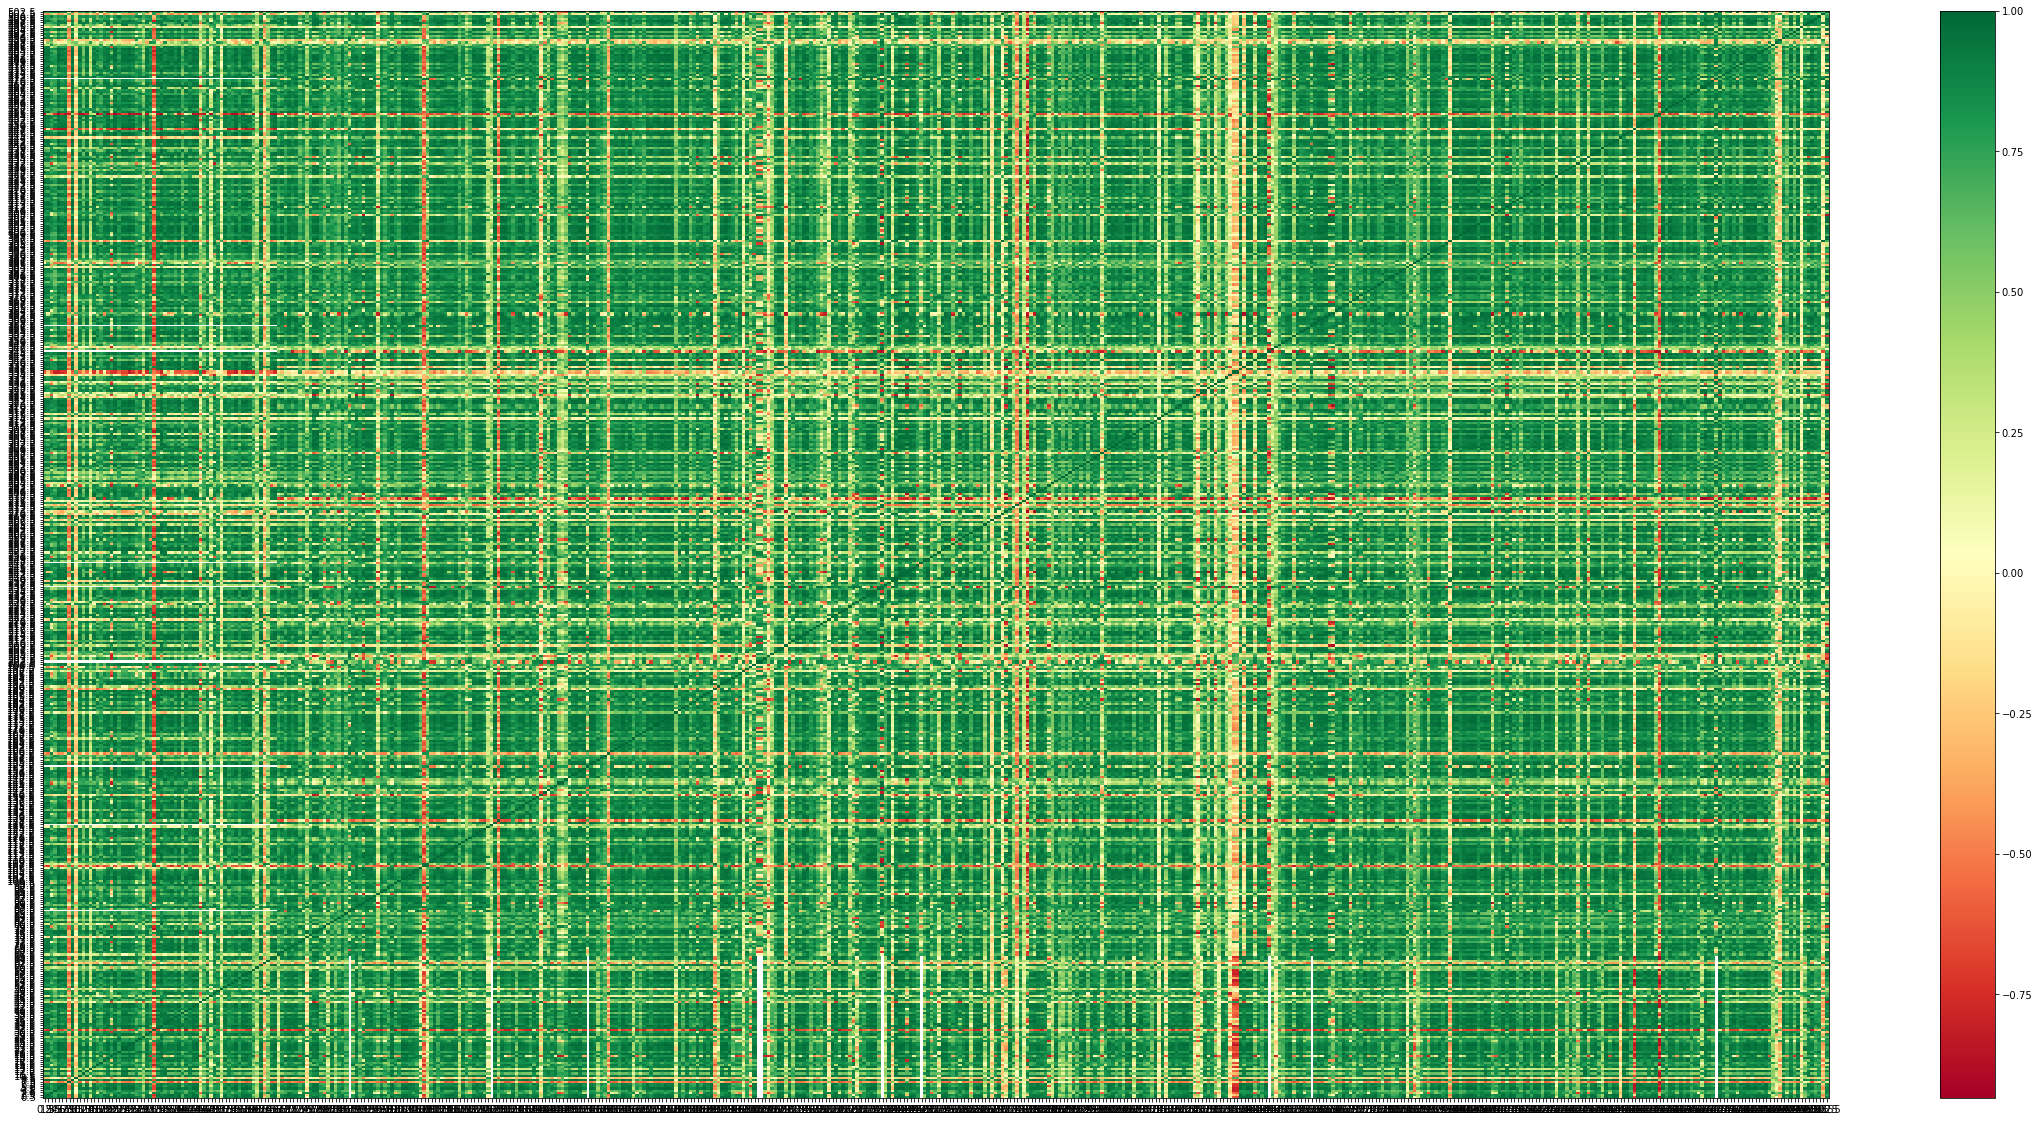

In [73]:
visualize_data()